<a href="https://colab.research.google.com/github/notpromising/CIFAR-10/blob/main/CIFAR_10_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment4
For this assignment, your task is to train a several convolutional neural networks to classify CIFAR-10 images. CIFAR-10 is a 10-class image classification dataset with 50,000 training images and 10,000 test images. You can find more info in https://www.cs.toronto.edu/~kriz/cifar.html. You should define a simple CNN with restrictions to classify this dataset. 

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.datasets import cifar10

from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten

#### Step-1: Import dataset
Load the CIFAR-10 dataset using `cifar10.load_data()` and use 10% of training images as validation data.

In [ ]:
###### Your codes start here.######
#load dataset 
(x_train, y_train), (x_test, y_test)=cifar10.load_data()
#print(x_train.shape, y_train.shape, x_test.shape, y_test.shape) 

#xv,yv=dataset_train[:,:2], dataset_train[:,-1]
x_train, x_val, y_train, y_val=train_test_split(x_train, y_train, test_size=0.1, shuffle=True, random_state=144)
#torch.manual_seed(43)
#val_size = 5000
#train_size = len(dataset) - val_siz
#Source: https://medium.com/@sergioalves94/deep-learning-in-pytorch-with-cifar-10-dataset-858b504a6b54
#source http://home.mit.bme.hu/~hadhazi/Oktatas/NN18/dem3/html_demo/CIFAR-10Demo.html

#split the data into training, val and test data set
#use 10% as validation data
###### Your codes start here.######
assert x_train.shape == (45000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert x_val.shape == (5000, 32, 32, 3)
assert y_val.shape == (5000, 1)
assert y_train.shape == (45000, 1)
assert y_test.shape == (10000, 1)
# print(x_train.shape, y_train.shape, x_val.shape, y_val.shape,  x_test.shape, y_test.shape)

170508288/170498071 [==============================] - 13s 0us/step


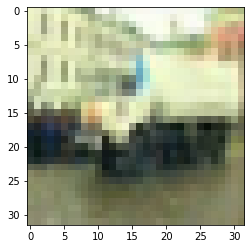

In [ ]:
#Visulize one image from CIFAR
plt.imshow(x_train[0], cmap=plt.cm.binary)

#### Step-2: Normalize iamges
Now the range of pixel values is from 0 to 255. Normalize the images in training set, validation set, and test set to 0-1.

In [ ]:
###### Your codes start here.######
#we can convert from int to float
#normalize to range 0-1
x_train=x_train/255
x_test=x_test/255
x_val=x_val/255

###### Your codes end here.######

#### Step-3: Build a neural network.
Build your convolutional neural networks by adding some layers. You should use 2 convolution layers and ReLU as the default activation function. The kernel size of both layers should be 3x3. Use 32 and 64 as the number of filters for the first and the second convolutional layers, respectively. After that, flatten your input and add two more dense layers. There should be 1024 units in the first dense with ReLU activation, and use 10 hidden units in the second dense layer with softmax activation. The requirements are same for the following questions.

In [ ]:
###### Your code starts here. ######
from keras.models import Sequential
#develop our network model
#kernel_initializer='he_uniform', padding='same',
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
#model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#model.add(MaxPooling2D((2, 2)))
#model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D((2, 2)))
#model.add(MaxPooling2D((2, 2)))


# example output part of the model
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))
###### Your codes end here.######
    


#### Step-4: Train the model
Compile model here and set your initial hyperparameters. Use SGD as the optimizer with initial learning rate 0.01. You could choose 'sparse_categorical_crossentropy' as your loss function, and the metrics should be 'accuracy'. After that, train your model for 10 epochs. The requirements are same for the following questions.

In [ ]:
###### Your code starts here. ######
#use SGD as the optimizer with lr as 0.01
opt = SGD(learning_rate=0.01)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,validation_data=(x_val,y_val))
#print(model)

###### Your code end here. ######

In [ ]:
#Evaluation
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss, test_acc)

#### Step-5: Regularization
Add one dropout layer with 0.5 drop rate between the two dense layer and apply a SGD with momentum 0.9. You can keep all other hyperparameters the same.

In [ ]:
###### Your code starts here. ######
from keras.layers import Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
#model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#model.add(MaxPooling2D((2, 2)))
#model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D((2, 2)))

# example output part of the model
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
#model.add(Conv2D(64, (3, 3), activation='relu'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,validation_data=(x_val,y_val))


###### Your codes end here.######

In [ ]:
#Evaluation
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss, test_acc)

#### Step-6: Deeper neural network

Try to add two more convolution layers in your model (four in total). Use 128 as the number of filters for two extra convolution layers, and 3x3 as the kernel size.

In [ ]:
###### Your code starts here. ######
#model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
#model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#model.add(MaxPooling2D((2, 2)))
#model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D((2, 2)))
#model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))

# example output part of the model
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
#model.add(Conv2D(64, (3, 3), activation='relu'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,validation_data=(x_val,y_val))

###### Your codes end here.######

In [ ]:
#Evaluation
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss, test_acc)

#### Step-7: Activation function

Try another activation function, such as elu, P-ReLU.

In [ ]:
###### Your code starts here. ######
#keras.layers.PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=None)
#model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
from keras.models import Sequential
from keras.layers.advanced_activations import PReLU
model = Sequential()
model.add(Conv2D(32, (3, 3), activation=PReLU(), input_shape=(32, 32, 3)))
#model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#model.add(MaxPooling2D((2, 2)))
#model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation=PReLU()))
#model.add(MaxPooling2D((2, 2)))
#model.add(MaxPooling2D((2, 2)))

# example output part of the model
model.add(Flatten())
model.add(Dense(1024, activation=PReLU()))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
#model.add(Conv2D(64, (3, 3), activation='relu'))
opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,validation_data=(x_val,y_val))
###### Your codes end here.######

In [ ]:
#Evaluation
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss, test_acc)